<a href="https://colab.research.google.com/github/BautistaDavid/Monitorias_2021_2/blob/main/Monitoria_4_Rungue_Kutta_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Metodo De Euler**


**Muy en resumen es** un metodo que permite resolver ecuaciones difrenciales de primer orden(EDO) a paritr de un problema de valor inicial dado.

Informacion Requerida para abordar una ecuacion difrencial por este metodo:

$$ P.V.I= \left \{ \begin{matrix} \frac{dy}{dx}=f(x,y) & \mbox{EDO}
\\ y(x_0)=y_0 & \mbox{Valor Inicial}\end{matrix}\right. $$


##**Ejercicio**

## ECUACIONES PARA TENER EN CUENTA METODO DE EULER

$$x_{n+1}=x_n+h$$
$$$$
$$y_{m+1}=y_n+h*An$$

$$An=f(x_n,y_n)$$ 

In [ ]:
def A_n(x,y):
  return 2*x*y
  
def M_Euler(x,y,h):
  global resultados
  lista_x=[]
  lista_y=[]
  lista_an=[]
  for i in range(40):
    #print(f"x_{i}:{x}\t y_{i}:{y}") 
    lista_x.append(x)
    lista_y.append(y)
    y=y+h*A_n(x,y)
    x=x+h

  resultados=pd.DataFrame({"x":lista_x,"y":lista_y})
  return resultados.head(10)


In [ ]:
M_Euler(1,1,0.1)

,x,y
0,1.0,1.000000
1,1.1,1.200000
2,1.2,1.464000
3,1.3,1.815360
4,1.4,2.287354
5,1.5,2.927813
6,1.6,3.806156
7,1.7,5.024126
8,1.8,6.732329
9,1.9,9.155968


In [ ]:
X=np.linspace(0,1,5)
Y=(X**3-3*X+8)**(1/3)

# **Ejercicio**

$$\frac{dy}{dx}=2xy\hspace{2 cm}y(1)=1\hspace{2 cm}y(2)=??$$

# **Runge-Kutta 2**

##**Problema**

$$\frac{dy}{dx}=f(x,y)\hspace{2 cm} y(x_0)=y_0$$


##**Formulas:**

$$ x_{i+1}=x_1+h$$
$$ $$
$$y_{i+1}=y_i+(a_1k_1+a_2k_2)h$$
$$ $$
**Donde:**
$$ k_1=f(x_i,y_i)$$
$$ $$
$$k_2=f(x_i+p_1h\hspace{0.15 cm},\hspace{0.15 cm}y_i+q_{11}k_1h)$$
$$ $$
**Tener en cuenta que...**
$$ a_1=1-a_2$$
$$ $$
$$p_1=\frac{1}{2a_2}$$
$$ $$
$$q_{11}=\frac{1}{2a_2}$$
$$ $$
**¿y $a_2$?**

1. Heun $\rightarrow \hspace{0.2 cm}a_2=\frac{1}{2}$
$$ $$
2. Ralston $\rightarrow \hspace{0.2 cm}a_2=\frac{2}{3}$
$$ $$
3. Punto Medio $\rightarrow \hspace{0.2 cm}a_2=1$


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt


In [ ]:
def f(x,y):
  return 2*x*y

def Runge_Kutta_2(x,y,h,a_2):     #h=0.1
  global lista_x,lista_y
  lista_x=[]
  lista_y=[]
  lista_k_1=[]
  lista_k_2=[]    #creamos lista para guardar informacion 

  a_1=1-a_2
  p_1=1/(2*a_2)
  q_11=1/(2*a_2)  #definimos parametros

  for i in range(40):
    lista_x.append(x)       #guardamos los datos (apenas inicia el bucle para poder guardar los datos iniciales )
    lista_y.append(y)  
                            # capturamos el valor de las variables

    k_1=f(x,y)
    k_2=f(x+p_1*h,y+q_11*k_1*h)

    lista_k_1.append(k_1)
    lista_k_2.append(k_2)

    #print(f"x:{x},y:{y}")
    y=y+(a_1*k_1+a_2*k_2)*h
    x=x+h

  resultados=pd.DataFrame({"x":lista_x,"y":lista_y,"K_1":lista_k_1,"k_2":lista_k_2})     #creamos una tabla para presentar mas organizado 

  
  
  return resultados.head(10)





In [ ]:
Runge_Kutta_2(1,1,0.1,0.5)

,x,y,K_1,k_2
0,1.0,1.000000,2.000000,2.640000
1,1.1,1.232000,2.710400,3.607296
2,1.2,1.547885,3.714924,4.990381
3,1.3,1.983150,5.156190,6.996553
4,1.4,2.590787,7.254204,9.948623
5,1.5,3.450929,10.352786,14.355863
6,1.6,4.686361,14.996355,21.032388
7,1.7,6.487798,22.058513,31.297138
8,1.8,9.155581,32.960090,47.316041
9,1.9,13.169387,50.043671,72.695017


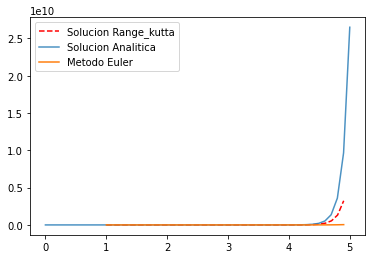

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X=np.linspace(0,5)
Y=np.exp(X**2)/np.exp(1)
plt.plot(lista_x,lista_y,label="Solucion Range_kutta",color="red",alpha=1,linestyle="--")   #solucion por metodo 
plt.plot(X,Y,label="Solucion Analitica",alpha=0.8) 
plt.plot(resultados["x"],resultados["y"],label="Metodo Euler")  #solucion analitica
plt.legend()
                                                  

In [ ]:
resultados.columns

Index(['x', 'y'], dtype='object')

In [ ]:
from sympy import *

In [ ]:
x=Symbol("x")
y=Function("y")


ics={y(1):1}
dsolve(Eq(y(x).diff(x),2*x*y(x)),ics=ics)

Eq(y(x), exp(-1)*exp(x**2))

In [ ]:
np.exp(1)

2.718281828459045

In [ ]:
lista_x

[1,
 1.1,
 1.2000000000000002,
 1.3000000000000003,
 1.4000000000000004,
 1.5000000000000004,
 1.6000000000000005,
 1.7000000000000006,
 1.8000000000000007,
 1.9000000000000008]

In [ ]:
def f(x):
  x**2

In [ ]:
from sympy import * 

y=Function("y")
x=Symbol("x")
ics={y(1):1}
dsolve(Eq(y(x).diff(x),2*x*y(x)),ics=ics)

Eq(y(x), exp(-1)*exp(x**2))